# Support Vector Machine for American Sign Language Recognition.


## STEP 1: Import all the dependencies and Load data

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [24]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [26]:
train_data = pd.read_csv('/data/sign_mnist_train.csv')
test_data = pd.read_csv('/data/sign_mnist_test.csv')

## STEP 2: Data Exploration and Preprocessing
### Checking unique labels and statistics

In [27]:
order = list(np.sort(train_data['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [29]:
round(train_data.drop('label', axis=1).mean(), 2)

pixel1      145.42
pixel2      148.50
pixel3      151.25
pixel4      153.55
pixel5      156.21
             ...  
pixel780    162.74
pixel781    162.91
pixel782    161.97
pixel783    161.14
pixel784    159.82
Length: 784, dtype: float64

## STEP 3: Data Preprocessing: Separating X and Y variables, Normalization, and Train-Test Split
### Separating X and Y variables

In [30]:
y = train_data['label']
X = train_data.drop(columns = 'label')

## Normalization

X = X/255.0
test_data = test_data/255.0

In [31]:
from sklearn.preprocessing import scale
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

## STEP 4: Linear Model Training and Evaluation
### Model training - Linear SVM

In [32]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [33]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# Calculate precision, recall, f-score, and support
p, r, f, s = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print("Precision:", p)
print("Recall:", r)
print("F-score:", f)

accuracy: 0.9979361417991988 

Precision: 0.9979856315925464
Recall: 0.9979361417991988
F-score: 0.9979353028586274


## STEP 5: Non-linear Model Training and Evaluation (RBF Kernel)
### Model training - Non-linear SVM (RBF Kernel)

In [35]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [36]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

p, r, f, s = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print("Precision:", p)
print("Recall:", r)
print("F-score:", f)

accuracy: 0.9732912468131601 

Precision: 0.9735947290006027
Recall: 0.9732912468131601
F-score: 0.9733090282954927


## STEP 6: Hyperparameter Tuning using Grid Search Cross-Validation

In [37]:
# creating a KFold object with 5 splits
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

In [38]:

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [5,10]}]

In [39]:
# specify model
model = SVC(kernel="linear")

In [40]:
# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model,
                        param_grid = hyper_params,
                        scoring= 'accuracy',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

In [41]:
# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=SVC(kernel='linear'),
             param_grid=[{'C': [5, 10], 'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [42]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.553694,0.276207,0.690253,0.065445,5,0.01,"{'C': 5, 'gamma': 0.01}",0.992721,0.992714,0.993625,...,0.99399,0.001688,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,2.561911,0.246921,0.768502,0.120962,5,0.001,"{'C': 5, 'gamma': 0.001}",0.992721,0.992714,0.993625,...,0.99399,0.001688,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,3.272647,0.699623,1.087060,0.598227,5,0.0001,"{'C': 5, 'gamma': 0.0001}",0.992721,0.992714,0.993625,...,0.99399,0.001688,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,2.575888,0.279869,0.710398,0.035141,10,0.01,"{'C': 10, 'gamma': 0.01}",0.992721,0.992714,0.993625,...,0.99399,0.001688,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,2.718134,0.247010,0.727607,0.061382,10,0.001,"{'C': 10, 'gamma': 0.001}",0.992721,0.992714,0.993625,...,0.99399,0.001688,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,2.663212,0.267562,1.034805,0.475278,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.992721,0.992714,0.993625,...,0.99399,0.001688,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [43]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9939903969662767 corresponding to hyperparameters {'C': 5, 'gamma': 0.01}


## STEP 7: Model Training with Optimal Hyperparameters

In [44]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="linear")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")

accuracy 0.9979361417991988 



## STEP 8: Model Complexity Analysis for SVM

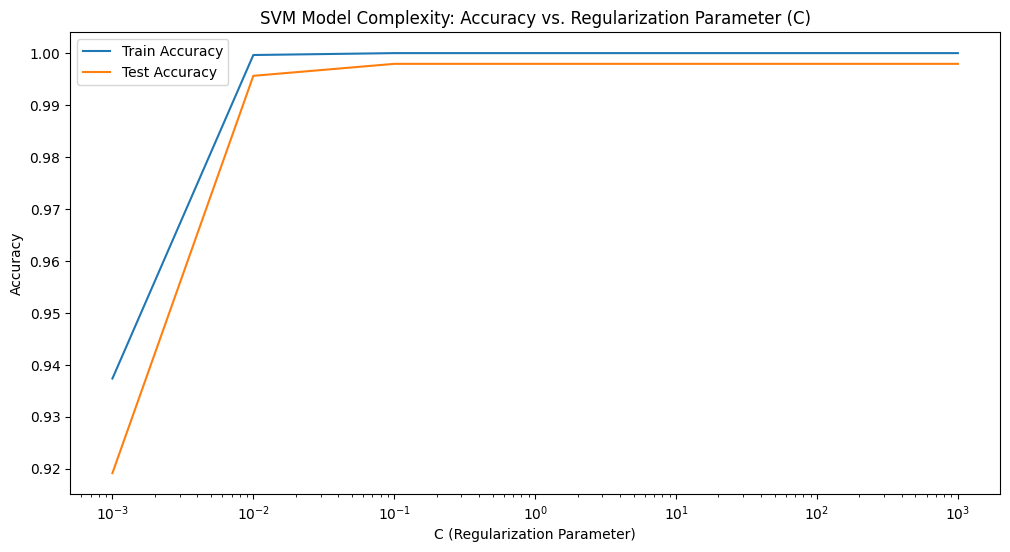

In [45]:
from sklearn.svm import SVC

# Model Complexity Analysis for SVM
# Analyzing how the complexity of the SVM model (C parameter) affects accuracy
# C_values = [0.1, 1, 10, 100]  # Adjust these values as needed for your analysis
C_values = np.logspace(-3, 3, 7)
train_accuracy = []
test_accuracy = []

for c in C_values:
    svm_complexity = SVC(kernel='linear', C=c)  # Use appropriate kernel and parameters
    svm_complexity.fit(X_train, y_train)
    train_accuracy.append(svm_complexity.score(X_train, y_train))
    test_accuracy.append(svm_complexity.score(X_test, y_test))

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(C_values, train_accuracy, label='Train Accuracy')
plt.plot(C_values, test_accuracy, label='Test Accuracy')
plt.xscale('log')  # Use log scale for C values
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.title('SVM Model Complexity: Accuracy vs. Regularization Parameter (C)')
plt.legend()
plt.show()


## STEP 9: Accuracy vs. Training Data Size Analysis

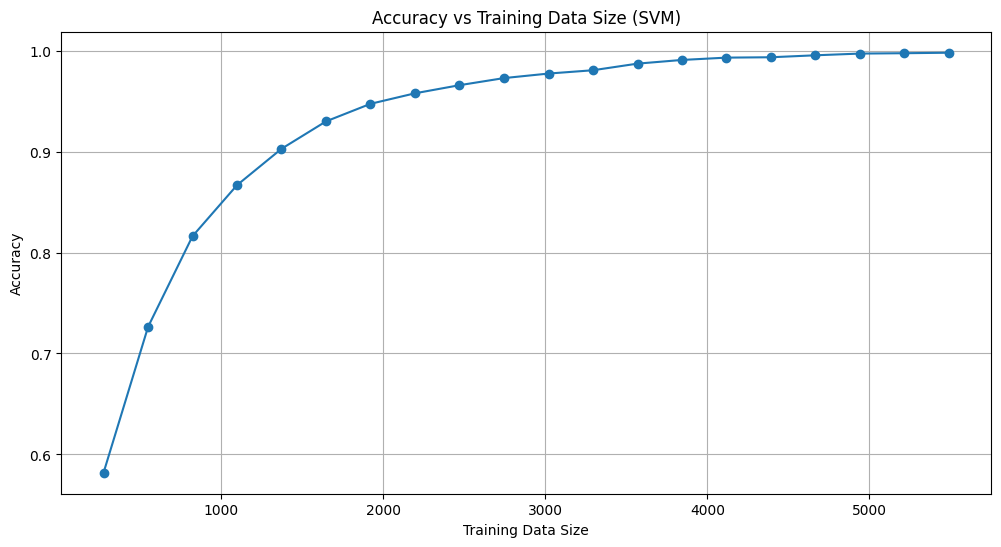

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Function to calculate accuracy with different sizes of training data for SVM
def calculate_accuracy_vs_datasize_svm(X_train, y_train, X_test, y_test, step_size=0.05):
    accuracies = []
    training_sizes = []

    for size in np.arange(step_size, 1 + step_size, step_size):
        # Determine the size of the current subset
        subset_size = int(size * len(X_train))
        training_sizes.append(subset_size)

        # Subset of the training data
        subset_X_train = X_train[:subset_size]
        subset_y_train = y_train[:subset_size]

        # Train the SVM classifier and calculate accuracy
        svm_classifier = SVC(kernel='linear', C=1.0)  # Use appropriate kernel and parameters
        svm_classifier.fit(subset_X_train, subset_y_train)
        y_pred = svm_classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    return training_sizes, accuracies

# Calculate accuracies with different sizes of training data for SVM
training_sizes_svm, accuracies_svm = calculate_accuracy_vs_datasize_svm(
    X_train, y_train, X_test, y_test
)

# Plot the results for SVM
plt.figure(figsize=(12, 6))
plt.plot(training_sizes_svm, accuracies_svm, marker='o')
plt.title('Accuracy vs Training Data Size (SVM)')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

## STEP 10: Comparison of Linear vs. Non-linear Kernel SVM

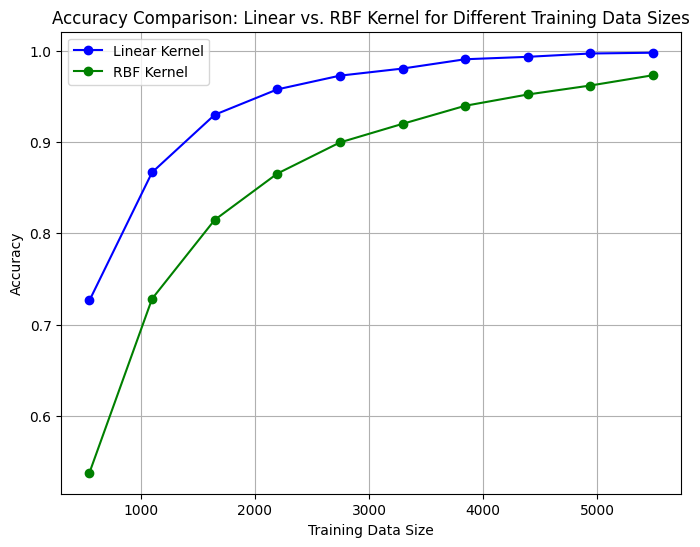

In [47]:
from sklearn.metrics import accuracy_score

# Create empty lists to store accuracies for linear and non-linear models
linear_accuracies = []
non_linear_accuracies = []
training_sizes = []

# Define different training dataset sizes
for size in range(10, 101, 10):  # Adjust range according to your needs
    subset_size = int(size / 100 * len(X_train))  # Subset size as a percentage of the full training data
    X_train_subset = X_train[:subset_size]
    y_train_subset = y_train[:subset_size]
    training_sizes.append(subset_size)

    # Train linear model
    model_linear = SVC(kernel='linear')
    model_linear.fit(X_train_subset, y_train_subset)
    y_pred_linear = model_linear.predict(X_test)
    accuracy_linear = accuracy_score(y_test, y_pred_linear)
    linear_accuracies.append(accuracy_linear)

    # Train non-linear model (RBF kernel)
    non_linear_model = SVC(kernel='rbf')
    non_linear_model.fit(X_train_subset, y_train_subset)
    y_pred_non_linear = non_linear_model.predict(X_test)
    accuracy_non_linear = accuracy_score(y_test, y_pred_non_linear)
    non_linear_accuracies.append(accuracy_non_linear)

# Plotting the comparison
plt.figure(figsize=(8, 6))
plt.plot(training_sizes, linear_accuracies, marker='o', label='Linear Kernel', color='blue')
plt.plot(training_sizes, non_linear_accuracies, marker='o', label='RBF Kernel', color='green')
plt.title('Accuracy Comparison: Linear vs. RBF Kernel for Different Training Data Sizes')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Support Vector Machine for Indian Sign Language

## SVM on ISL dataset Linear Kernel

### Import all the dependencies and Load data

In [1]:
import pandas as pd
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [2]:
def process_image(file_path, image_size=(64, 64)):
    image = imread(file_path)
    image_resized = resize(image, image_size, anti_aliasing=True)
    return image_resized.flatten()

In [3]:
# Replace 'path/to/train_classes.csv' with the actual path to your CSV file
train_data_path = '/Users/swapn/Downloads/data/train_classes.csv'
train_df = pd.read_csv(train_data_path)

# Replace 'path/to/images/' with the actual path to your images directory
train_features = np.array([process_image(f'/Users/swapn/Downloads/data/train/{fname}') for fname in train_df['filename']])

###  Building the model

In [4]:
train_labels = train_df.drop(columns=['filename']).values

train_features_scaled = minmax_scale(train_features)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear') 

# Fit the classifier on the scaled training data
# svm_classifier.fit(train_features_scaled, train_labels)

# Convert the one-hot encoded labels to single integer labels
train_labels_single = np.argmax(train_labels, axis=1)

# fit the classifier on the scaled training data with the correct shape of labels
svm_classifier.fit(train_features_scaled, train_labels_single)

SVC(kernel='linear')

### Calculating the Score

In [5]:
# Replace with your validation data path and processing
valid_data_path = '/Users/swapn/Downloads/data/valid_classes.csv'
valid_df = pd.read_csv(valid_data_path)
valid_features = np.array([process_image(f'/Users/swapn/Downloads/data/valid/{fname}') for fname in valid_df['filename']])

# If valid_labels are one-hot encoded, convert them to single integer labels
valid_labels = valid_df.drop(columns=['filename']).values
if valid_labels.ndim > 1 and valid_labels.shape[1] > 1:
    valid_labels_single = np.argmax(valid_labels, axis=1)
else:
    valid_labels_single = valid_labels.ravel()

valid_features_scaled = minmax_scale(valid_features)

# Make predictions on the validation set using the SVM classifier
valid_predictions = svm_classifier.predict(valid_features_scaled)

# Calculate metrics for the validation set
accuracy = accuracy_score(valid_labels_single, valid_predictions)
precision, recall, fscore, _ = precision_recall_fscore_support(valid_labels_single, valid_predictions, average='weighted')

# Print out the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {fscore}')


Accuracy: 0.972180824639841
Precision: 0.9725916453686667
Recall: 0.972180824639841
F1 Score: 0.9720361424653999


### Calculating the score on TEST data

In [6]:
# Replace with your test data path and processing
test_data_path = '/Users/swapn/Downloads/data/test_classes.csv'
test_df = pd.read_csv(test_data_path)
test_features = np.array([process_image(f'/Users/swapn/Downloads/data/test/{fname}') for fname in test_df['filename']])

# If test_labels are one-hot encoded, convert them to single integer labels
test_labels = test_df.drop(columns=['filename']).values
if test_labels.ndim > 1 and test_labels.shape[1] > 1:
    test_labels_single = np.argmax(test_labels, axis=1)
else:
    test_labels_single = test_labels.ravel()

test_features_scaled = minmax_scale(test_features)

# Make predictions on the test set using the SVM classifier
test_predictions = svm_classifier.predict(test_features_scaled)

# Calculate metrics for the test set
accuracy = accuracy_score(test_labels_single, test_predictions)
precision, recall, fscore, _ = precision_recall_fscore_support(test_labels_single, test_predictions, average='weighted')

# Print out the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {fscore}')


Accuracy: 0.9667493796526054
Precision: 0.967550127290174
Recall: 0.9667493796526054
F1 Score: 0.9667427462201538


## Plotting the graph for Confusion matrix

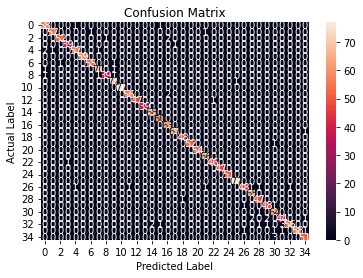

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming valid_labels_single and valid_predictions are available from your validation set
cm = confusion_matrix(valid_labels_single, valid_predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


## SVM on ISL dataset Non-Linear (RBF) kernel

## Training the non-linear model

In [8]:

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf') 

# Fit the classifier on the scaled training data
# svm_classifier.fit(train_features_scaled, train_labels)

# Convert the one-hot encoded labels to single integer labels
train_labels_single = np.argmax(train_labels, axis=1)

# fit the classifier on the scaled training data with the correct shape of labels
svm_classifier.fit(train_features_scaled, train_labels_single)

SVC()

## Calculating Accuracies for Non-linear model

In [9]:
# Replace with your test data path and processing
test_data_path = '/Users/swapn/Downloads/data/test_classes.csv'
test_df = pd.read_csv(test_data_path)
test_features = np.array([process_image(f'/Users/swapn/Downloads/data/test/{fname}') for fname in test_df['filename']])

# If test_labels are one-hot encoded, convert them to single integer labels
test_labels = test_df.drop(columns=['filename']).values
if test_labels.ndim > 1 and test_labels.shape[1] > 1:
    test_labels_single = np.argmax(test_labels, axis=1)
else:
    test_labels_single = test_labels.ravel()

test_features_scaled = minmax_scale(test_features)

# Make predictions on the test set using the SVM classifier
test_predictions = svm_classifier.predict(test_features_scaled)

# Calculate metrics for the test set
accuracy = accuracy_score(test_labels_single, test_predictions)
precision, recall, fscore, _ = precision_recall_fscore_support(test_labels_single, test_predictions, average='weighted')

# Print out the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {fscore}')

Accuracy: 0.9806451612903225
Precision: 0.9813608775746392
Recall: 0.9806451612903225
F1 Score: 0.9806164780079211
